In [ ]:
# libraries to import datasets
import os
import matplotlib.pyplot as plt
import seaborn as sn  # for data visualization
import matplotlib as mp
import cv2
from random import randint as rint

import numpy as np

from sklearn.model_selection import train_test_split #for spliting dataset into training and validation dataset
from sklearn import metrics #for 

# libraries for CNN model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import regularizers
import tensorflow as tf
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
% cd /content/drive/MyDrive/Neural Network Project/

/content/drive/MyDrive/Neural Network Project


# Phase I

 1. Conversion of image into 2D numpy array and back  Using matplotlib    

In [ ]:
im = mp.image.imread("DrStrange.jpg")
print(type(im))

<class 'numpy.ndarray'>


In [ ]:
im

array([[[ 80,  72,  69],
        [ 79,  69,  67],
        [ 82,  72,  70],
        ...,
        [ 38,  39,  44],
        [ 40,  41,  46],
        [ 38,  39,  44]],

       [[ 83,  75,  72],
        [ 83,  75,  72],
        [ 88,  78,  76],
        ...,
        [ 39,  40,  45],
        [ 42,  43,  48],
        [ 37,  38,  43]],

       [[ 88,  80,  77],
        [ 92,  84,  81],
        [ 91,  83,  80],
        ...,
        [ 40,  41,  46],
        [ 41,  42,  47],
        [ 38,  39,  44]],

       ...,

       [[210, 108, 121],
        [198,  98, 110],
        [193,  93, 105],
        ...,
        [ 66,  65,  71],
        [ 63,  62,  68],
        [ 70,  69,  75]],

       [[206, 100, 114],
        [197,  95, 108],
        [190,  88, 101],
        ...,
        [ 67,  68,  73],
        [ 63,  62,  68],
        [ 71,  70,  76]],

       [[201,  95, 107],
        [194,  92, 105],
        [191,  89, 102],
        ...,
        [ 69,  70,  75],
        [ 67,  66,  72],
        [ 78,  77,  82]]

<class 'matplotlib.image.AxesImage'>


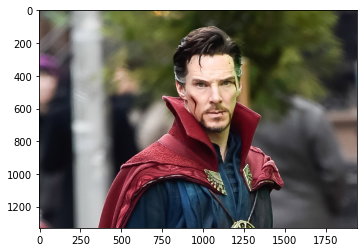

In [ ]:
im2 = plt.imshow(im)
print(type(im2))

Import Testing and Training dataset

In [ ]:
train_dir = 'mri_dataset/Training/'
test_dir = 'mri_dataset/Testing/'

In [ ]:
Classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

def read_img_labels(_dir):
  Images, labels = [], []
  for root, dirs, files in os.walk(_dir):
    f = os.path.basename(root)
    for file in files:
      labels.append(f)
      try:
        image = cv2.imread(root+'/'+file, -1)  #read image in grayscale
        image = cv2.resize(image, (200,200)) #make image of equal dimension
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        Images.append(image)
      except Exception as e:
        print(e)
  Images = np.array(Images)
  return (Images, labels)

In [ ]:
def get_class_index(labels):
    for i, j  in enumerate(labels):
      for k, n in enumerate(Classes):
        if j == n:
          labels[i] = k
    labels = np.array(labels)
    return labels

In [ ]:
train_imgs, train_lbls = read_img_labels(train_dir)
train_lbls = get_class_index(train_lbls)

print('Shape of train images: {}'.format(train_imgs.shape))
print('Shape of train labels: {}'.format(train_lbls.shape))

Shape of train images: (2870, 200, 200, 3)
Shape of train labels: (2870,)


In [ ]:
test_imgs, test_lbls = read_img_labels(test_dir)
test_lbls = get_class_index(test_lbls)

print('Shape of test images: {}'.format(test_imgs.shape))
print('Shape of test labels: {}'.format(test_lbls.shape))

Shape of test images: (394, 200, 200, 3)
Shape of test labels: (394,)


 Dividing into Training and validation data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_imgs, train_lbls, shuffle = True, test_size = 0.25, random_state = 42)
print('Shape of X_train: {} , y_train: {}'.format(X_train.shape,y_train.shape))
print('Shape of X_val: {} , y_val: {}'.format(X_val.shape,y_val.shape))

Shape of X_train: (2152, 200, 200, 3) , y_train: (2152,)
Shape of X_val: (718, 200, 200, 3) , y_val: (718,)


 Metrics for result evaluation

In [ ]:
def getmetricsReport(yTrue, yPred):
  conf = metrics.confusion_matrix(yTrue, yPred)
  acc = metrics.accuracy_score(yTrue, yPred)
  f1 = metrics.f1_score(yTrue, yPred, average='micro')
  print ("Confusion Matrix")
  print (conf)
  print()
  scores = {'accuracy': acc,'f1_score': f1,}
  for m, val in scores.items():
    print (f"{m}:\t{val:.4f}")
  
  plt.figure(figsize = (10,10))
  s=sn.heatmap(conf, xticklabels = Classes, yticklabels = Classes, cmap = 'Blues', annot=True)
  s.set(xlabel='Predicted Label', ylabel='True Label')
  return scores

 Plot for train and validation data

In [ ]:
def get_graph(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.ylabel('accuracy') 
  plt.xlabel('epoch')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.ylabel('Loss') 
  plt.xlabel('epoch')
  plt.legend()
  plt.show()
  return 

2. Basic CNN network to classify different tumor types 

## Basic CNN model

In [ ]:
def base_model():
  model = Sequential() 
  
  model.add(Conv2D(32, (3,3), activation = 'relu', strides=(1,1), input_shape = (200, 200, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3,3), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  

  model.add(Conv2D(64, (3,3), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model.add(Conv2D(128, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  

  model.add(Conv2D(128, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  
  model.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.001)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model
model = base_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 23, 23, 64)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/10
44/44 [==============================] - 20s 150ms/step - loss: 3.1520 - acc: 0.4484 - val_loss: 1.0385 - val_acc: 0.5334
Epoch 2/10
44/44 [==============================] - 6s 130ms/step - loss: 0.9121 - acc: 0.6032 - val_loss: 1.2334 - val_acc: 0.5139
Epoch 3/10
44/44 [==============================] - 6s 130ms/step - loss: 0.7729 - acc: 0.6896 - val_loss: 1.6248 - val_acc: 0.5292
Epoch 4/10
44/44 [==============================] - 6s 130ms/step - loss: 0.8417 - acc: 0.6589 - val_loss: 0.7686 - val_acc: 0.7047
Epoch 5/10
44/44 [==============================] - 6s 129ms/step - loss: 0.6078 - acc: 0.7635 - val_loss: 0.5730 - val_acc: 0.7855
Epoch 6/10
44/44 [==============================] - 6s 129ms/step - loss: 0.4512 - acc: 0.8267 - val_loss: 0.5338 - val_acc: 0.7967
Epoch 7/10
44/44 [==============================] - 6s 129ms/step - loss: 0.3637 - acc: 0.8532 - val_loss: 1.3828 - val_acc: 0.5738
Epoch 8/10
44/44 [==============================] - 6s 129ms/step - loss: 0

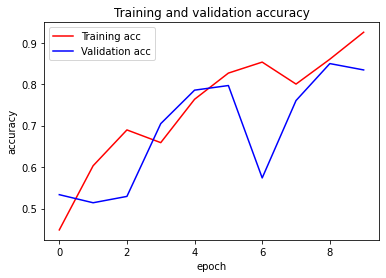

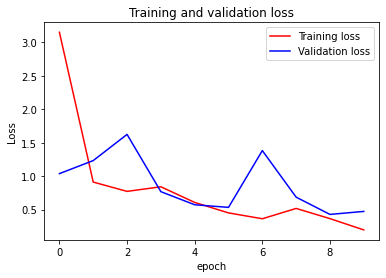

Performance on validation set:
Confusion Matrix
[[167  24   0   1]
 [ 24 165  23   5]
 [  1   7  88   1]
 [  5  23   5 179]]

accuracy:	0.8343
f1_score:	0.8343
Performance on test set:
                  precision    recall  f1-score   support

    glioma_tumor       0.71      0.17      0.27       100
meningioma_tumor       0.47      0.55      0.51       115
        no_tumor       0.46      0.93      0.62       105
 pituitary_tumor       0.96      0.34      0.50        74

        accuracy                           0.52       394
       macro avg       0.65      0.50      0.48       394
    weighted avg       0.62      0.52      0.48       394

Confusion Matrix
[[17 31 51  1]
 [ 3 63 49  0]
 [ 2  5 98  0]
 [ 2 34 13 25]]

accuracy:	0.5152
f1_score:	0.5152


{'accuracy': 0.5152284263959391, 'f1_score': 0.5152284263959391}

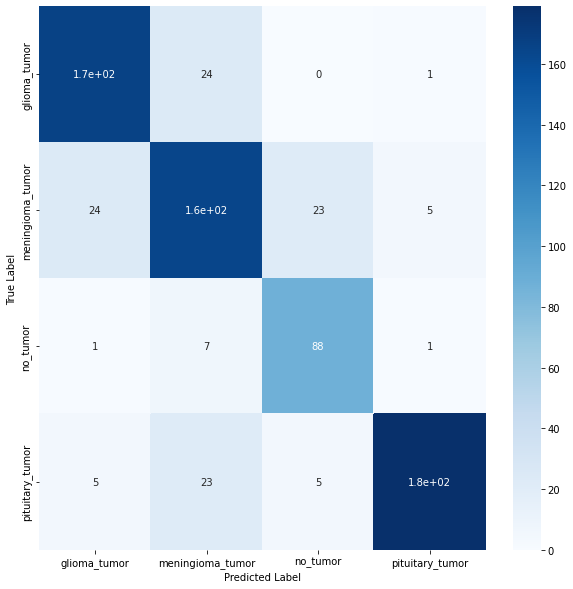

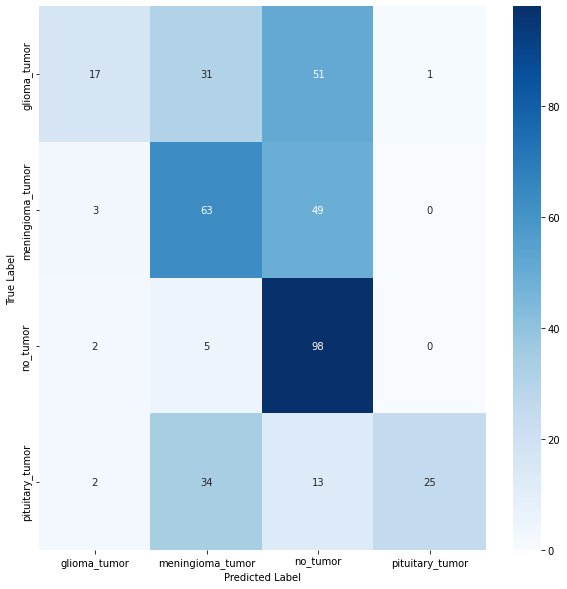

In [ ]:
get_graph(history)


print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
lab =['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
classification_metrics = metrics.classification_report(test_lbls, yPred, target_names = lab)
print(classification_metrics)
getmetricsReport(test_lbls, yPred)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/50
44/44 [==============================] - 7s 138ms/step - loss: 2.6705 - acc: 0.4475 - val_loss: 1.4211 - val_acc: 0.3524
Epoch 2/50
44/44 [==============================] - 6s 141ms/step - loss: 1.0218 - acc: 0.5511 - val_loss: 1.1384 - val_acc: 0.4499
Epoch 3/50
44/44 [==============================] - 6s 131ms/step - loss: 0.8658 - acc: 0.6143 - val_loss: 0.8461 - val_acc: 0.6630
Epoch 4/50
44/44 [==============================] - 6s 141ms/step - loss: 0.6314 - acc: 0.7379 - val_loss: 0.7887 - val_acc: 0.6602
Epoch 5/50
44/44 [==============================] - 7s 149ms/step - loss: 0.5211 - acc: 0.7932 - val_loss: 1.0755 - val_acc: 0.6267
Epoch 6/50
44/44 [==============================] - 6s 136ms/step - loss: 0.4544 - acc: 0.8099 - val_loss: 0.5885 - val_acc: 0.7632
Epoch 7/50
44/44 [==============================] - 6s 137ms/step - loss: 0.3460 - acc: 0.8652 - val_loss: 0.5199 - val_acc: 0.8329
Epoch 8/50
44/44 [==============================] - 7s 149ms/step - loss: 0.

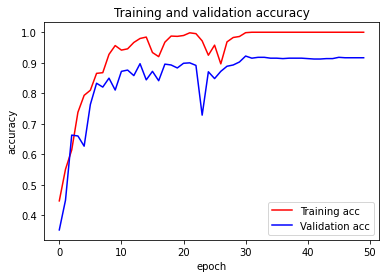

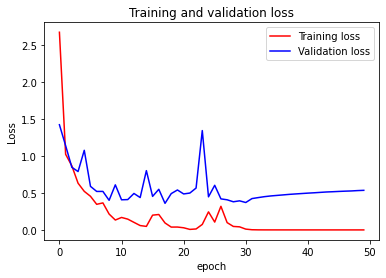

Performance on validation set:
Confusion Matrix
[[180  10   0   2]
 [ 14 186  12   5]
 [  1  10  84   2]
 [  1   2   1 208]]

accuracy:	0.9164
f1_score:	0.9164
Performance on test set:
Confusion Matrix
[[ 18  37  44   1]
 [  2 101  10   2]
 [  2   5  97   1]
 [  2  14  13  45]]

accuracy:	0.6624
f1_score:	0.6624


{'accuracy': 0.6624365482233503, 'f1_score': 0.6624365482233503}

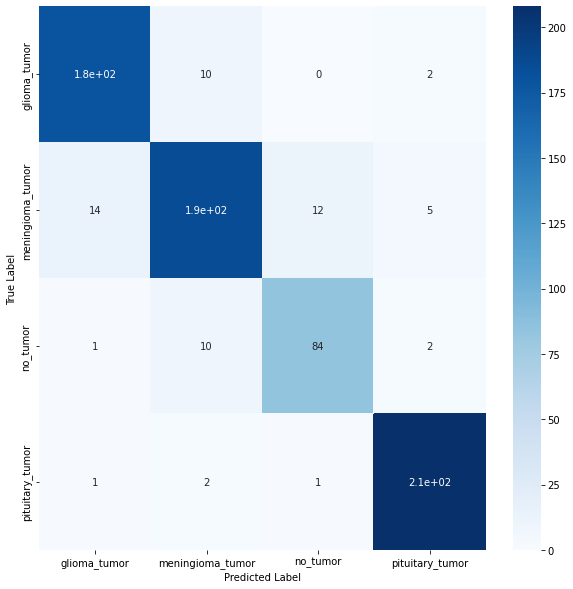

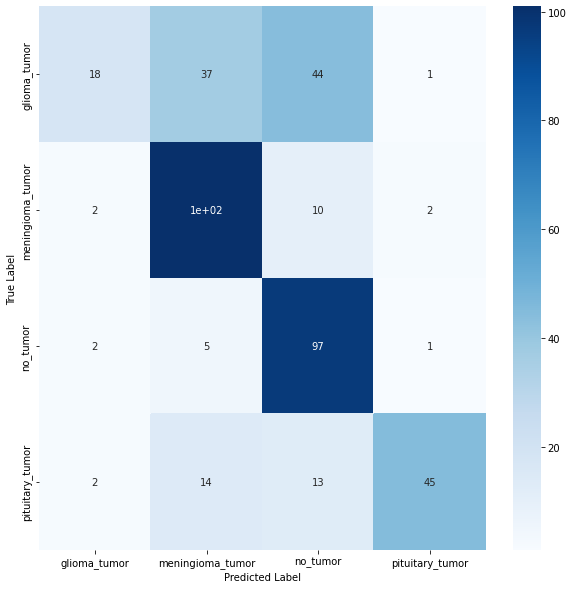

In [ ]:
get_graph(history)


print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(test_lbls, yPred)

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/25
44/44 [==============================] - 7s 152ms/step - loss: 2.3279 - acc: 0.4294 - val_loss: 1.0579 - val_acc: 0.5251
Epoch 2/25
44/44 [==============================] - 6s 130ms/step - loss: 0.9858 - acc: 0.5683 - val_loss: 0.9655 - val_acc: 0.5599
Epoch 3/25
44/44 [==============================] - 6s 130ms/step - loss: 0.8718 - acc: 0.6129 - val_loss: 0.9949 - val_acc: 0.5237
Epoch 4/25
44/44 [==============================] - 6s 129ms/step - loss: 0.7132 - acc: 0.6952 - val_loss: 0.7610 - val_acc: 0.6964
Epoch 5/25
44/44 [==============================] - 6s 129ms/step - loss: 0.5476 - acc: 0.7756 - val_loss: 0.6511 - val_acc: 0.7493
Epoch 6/25
44/44 [==============================] - 6s 129ms/step - loss: 0.4467 - acc: 0.8220 - val_loss: 0.7913 - val_acc: 0.7103
Epoch 7/25
44/44 [==============================] - 6s 130ms/step - loss: 0.3614 - acc: 0.8573 - val_loss: 0.4530 - val_acc: 0.8273
Epoch 8/25
44/44 [==============================] - 6s 130ms/step - loss: 0.

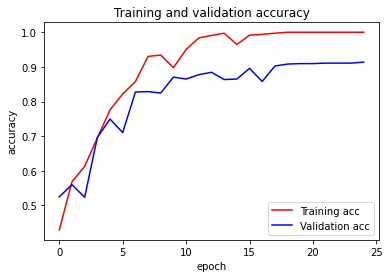

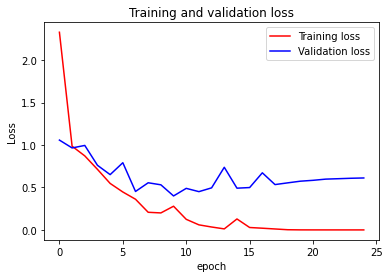

Performance on validation set:
Confusion Matrix
[[178  13   0   1]
 [ 14 187   8   8]
 [  1  11  83   2]
 [  3   1   0 208]]

accuracy:	0.9136
f1_score:	0.9136
Performance on test set:
Confusion Matrix
[[ 21  37  38   4]
 [  1 102   7   5]
 [  1   6  97   1]
 [  1  15   6  52]]

accuracy:	0.6904
f1_score:	0.6904


{'accuracy': 0.6903553299492385, 'f1_score': 0.6903553299492385}

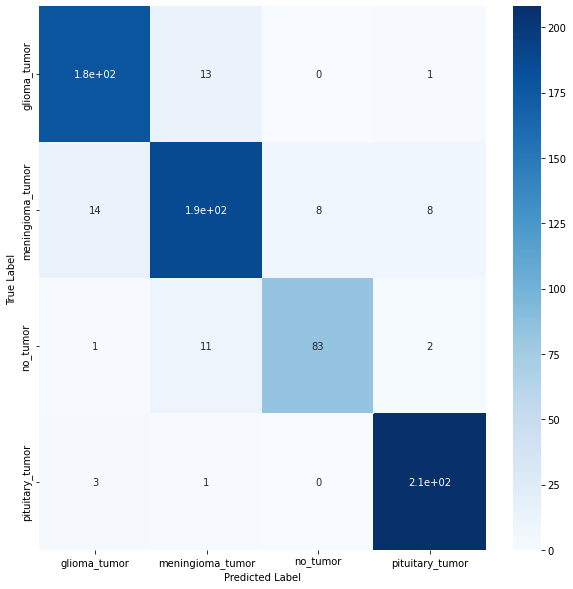

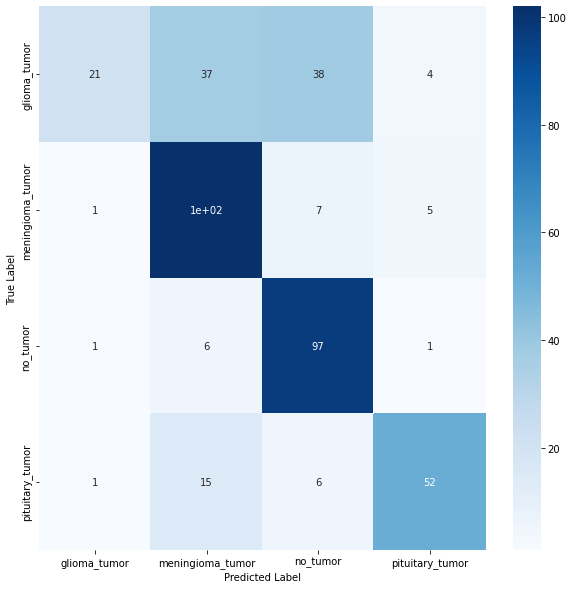

In [ ]:
get_graph(history)
print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(test_lbls, yPred)

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=20, validation_data=(X_val, y_val))

Epoch 1/25
108/108 [==============================] - 10s 75ms/step - loss: 1.8530 - acc: 0.4926 - val_loss: 0.8719 - val_acc: 0.6560
Epoch 2/25
108/108 [==============================] - 8s 72ms/step - loss: 0.7956 - acc: 0.6705 - val_loss: 0.6701 - val_acc: 0.7326
Epoch 3/25
108/108 [==============================] - 8s 71ms/step - loss: 0.5840 - acc: 0.7742 - val_loss: 0.5151 - val_acc: 0.8036
Epoch 4/25
108/108 [==============================] - 8s 73ms/step - loss: 0.3937 - acc: 0.8471 - val_loss: 0.6715 - val_acc: 0.7521
Epoch 5/25
108/108 [==============================] - 7s 66ms/step - loss: 0.3381 - acc: 0.8685 - val_loss: 0.5020 - val_acc: 0.8036
Epoch 6/25
108/108 [==============================] - 8s 71ms/step - loss: 0.2438 - acc: 0.9145 - val_loss: 0.7115 - val_acc: 0.7702
Epoch 7/25
108/108 [==============================] - 8s 73ms/step - loss: 0.1649 - acc: 0.9382 - val_loss: 0.8716 - val_acc: 0.7827
Epoch 8/25
108/108 [==============================] - 7s 66ms/step -

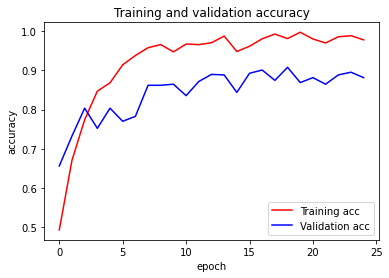

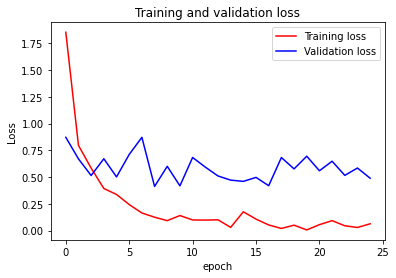

Performance on validation set:
Confusion Matrix
[[167  22   0   3]
 [ 19 176  10  12]
 [  1  10  81   5]
 [  2   0   1 209]]

accuracy:	0.8816
f1_score:	0.8816
Performance on test set:
Confusion Matrix
[[17 31 46  6]
 [ 1 99 10  5]
 [ 2  6 95  2]
 [ 0  6 10 58]]

accuracy:	0.6827
f1_score:	0.6827


{'accuracy': 0.682741116751269, 'f1_score': 0.682741116751269}

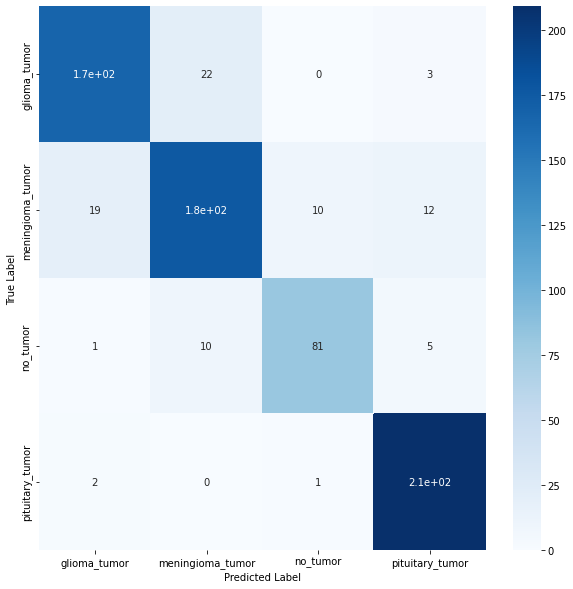

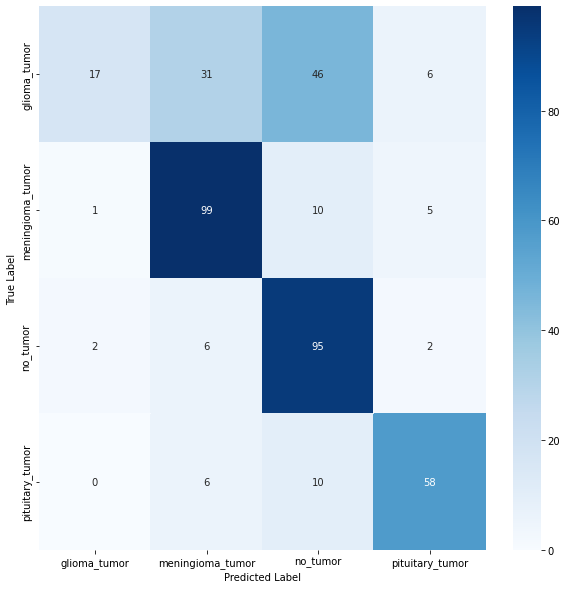

In [ ]:
get_graph(history)
print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(test_lbls, yPred)

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/25
22/22 [==============================] - 8s 340ms/step - loss: 4.4699 - acc: 0.4001 - val_loss: 1.2229 - val_acc: 0.5056
Epoch 2/25
22/22 [==============================] - 5s 246ms/step - loss: 1.0770 - acc: 0.5311 - val_loss: 0.9385 - val_acc: 0.5738
Epoch 3/25
22/22 [==============================] - 5s 247ms/step - loss: 0.8188 - acc: 0.6673 - val_loss: 0.7817 - val_acc: 0.6643
Epoch 4/25
22/22 [==============================] - 5s 246ms/step - loss: 0.6662 - acc: 0.7323 - val_loss: 0.6423 - val_acc: 0.7744
Epoch 5/25
22/22 [==============================] - 5s 246ms/step - loss: 0.5211 - acc: 0.7932 - val_loss: 0.5627 - val_acc: 0.8092
Epoch 6/25
22/22 [==============================] - 5s 246ms/step - loss: 0.4027 - acc: 0.8383 - val_loss: 0.5297 - val_acc: 0.7953
Epoch 7/25
22/22 [==============================] - 5s 246ms/step - loss: 0.4005 - acc: 0.8281 - val_loss: 0.4961 - val_acc: 0.8022
Epoch 8/25
22/22 [==============================] - 5s 246ms/step - loss: 0.

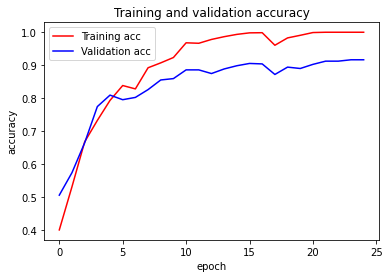

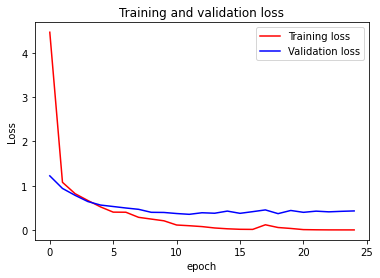

Performance on validation set:
Confusion Matrix
[[177  14   0   1]
 [ 14 186   8   9]
 [  1   7  87   2]
 [  2   2   0 208]]

accuracy:	0.9164
f1_score:	0.9164
Performance on test set:
Confusion Matrix
[[ 22  34  40   4]
 [  2 103   7   3]
 [  2   5  97   1]
 [  2  12   2  58]]

accuracy:	0.7107
f1_score:	0.7107


{'accuracy': 0.7106598984771574, 'f1_score': 0.7106598984771575}

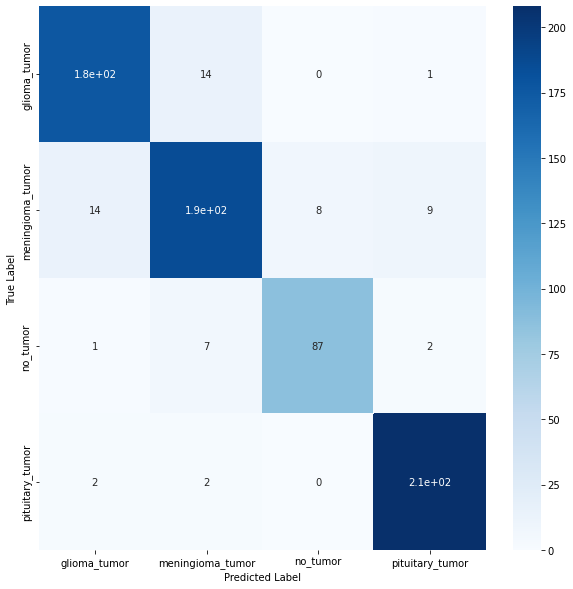

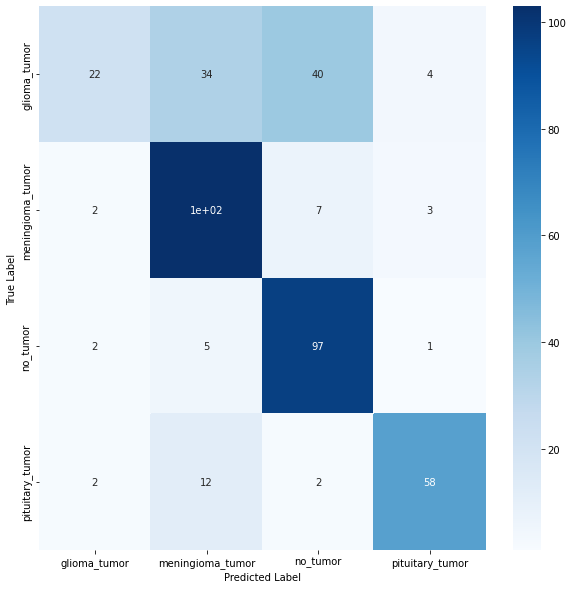

In [ ]:
get_graph(history)
print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(test_lbls, yPred)

In [ ]:
def base_model():
  model = Sequential() 
  
  model.add(Conv2D(32, (4,4), activation = 'relu', strides=(1,1), input_shape = (200, 200, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (4,4), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  

  model.add(Conv2D(64, (4,4), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model.add(Conv2D(128, (4,4), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  

  model.add(Conv2D(128, (4,4), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  
  model.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.001)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model
model = base_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 197, 197, 32)      1568      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 95, 95, 64)        32832     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 47, 47, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 44, 44, 64)        65600     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 22, 22, 64)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/25
22/22 [==============================] - 12s 359ms/step - loss: 5.0888 - acc: 0.3578 - val_loss: 1.1361 - val_acc: 0.5042
Epoch 2/25
22/22 [==============================] - 6s 290ms/step - loss: 1.0705 - acc: 0.5293 - val_loss: 0.8944 - val_acc: 0.6045
Epoch 3/25
22/22 [==============================] - 7s 320ms/step - loss: 0.8519 - acc: 0.6408 - val_loss: 0.8294 - val_acc: 0.6602
Epoch 4/25
22/22 [==============================] - 7s 315ms/step - loss: 0.6946 - acc: 0.7249 - val_loss: 0.6729 - val_acc: 0.7507
Epoch 5/25
22/22 [==============================] - 7s 315ms/step - loss: 0.5740 - acc: 0.7658 - val_loss: 0.6028 - val_acc: 0.7716
Epoch 6/25
22/22 [==============================] - 7s 315ms/step - loss: 0.4565 - acc: 0.8239 - val_loss: 0.5235 - val_acc: 0.8134
Epoch 7/25
22/22 [==============================] - 7s 316ms/step - loss: 0.3472 - acc: 0.8671 - val_loss: 0.5473 - val_acc: 0.8162
Epoch 8/25
22/22 [==============================] - 6s 285ms/step - loss: 0

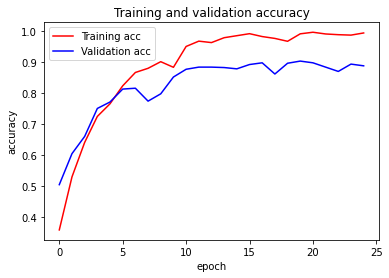

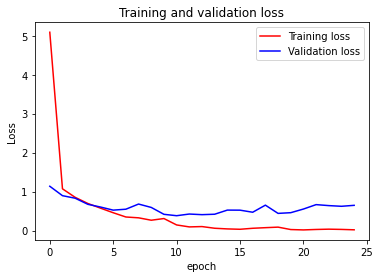

Performance on validation set:
Confusion Matrix
[[150  42   0   0]
 [  7 202   6   2]
 [  0  12  84   1]
 [  1   8   1 202]]

accuracy:	0.8886
f1_score:	0.8886
Performance on test set:
Confusion Matrix
[[ 17  52  26   5]
 [  1 108   4   2]
 [  0   6  98   1]
 [  0  34   0  40]]

accuracy:	0.6675
f1_score:	0.6675


{'accuracy': 0.6675126903553299, 'f1_score': 0.6675126903553299}

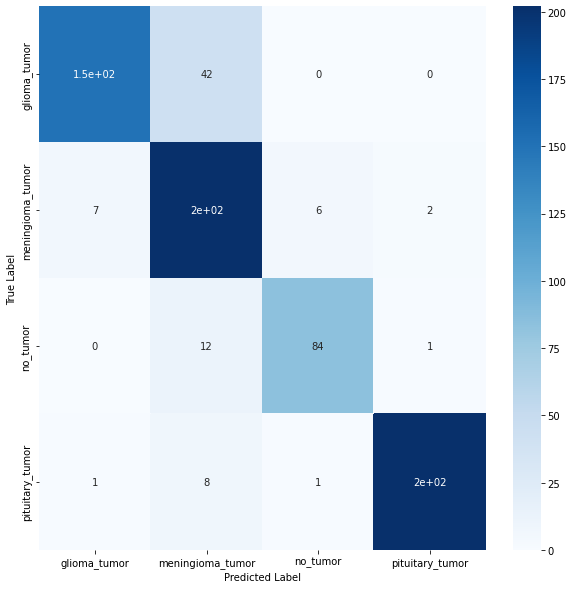

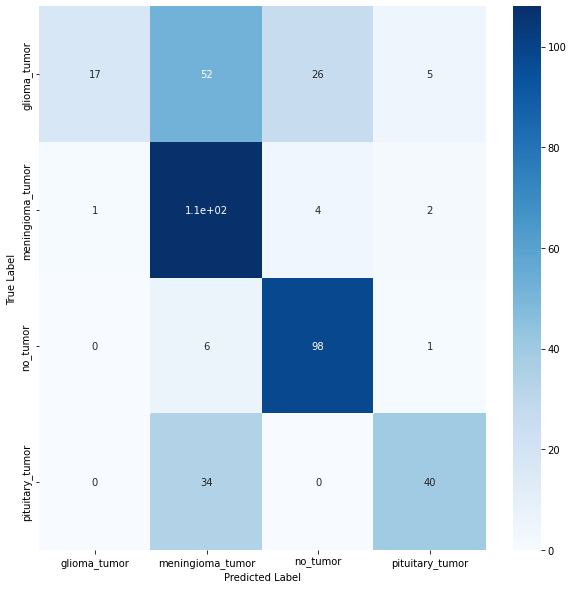

In [ ]:
get_graph(history)
print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(test_lbls, yPred)

In [ ]:
def base_model():
  model = Sequential() 
  
  model.add(Conv2D(32, (5,5), activation = 'relu', strides=(1,1), input_shape = (200, 200, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (5,5), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  

  model.add(Conv2D(64, (5,5), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model.add(Conv2D(128, (5,5), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  

  model.add(Conv2D(128, (5,5), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  
  model.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.001)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model
model = base_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 47, 47, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 43, 43, 64)        102464    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 21, 21, 64)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/25
22/22 [==============================] - 13s 394ms/step - loss: 6.4520 - acc: 0.3485 - val_loss: 1.2577 - val_acc: 0.4443
Epoch 2/25
22/22 [==============================] - 6s 270ms/step - loss: 1.1052 - acc: 0.5144 - val_loss: 0.9788 - val_acc: 0.6267
Epoch 3/25
22/22 [==============================] - 7s 300ms/step - loss: 0.9359 - acc: 0.6101 - val_loss: 0.8949 - val_acc: 0.6142
Epoch 4/25
22/22 [==============================] - 6s 271ms/step - loss: 0.7189 - acc: 0.6993 - val_loss: 0.7517 - val_acc: 0.6811
Epoch 5/25
22/22 [==============================] - 6s 272ms/step - loss: 0.5976 - acc: 0.7598 - val_loss: 0.6033 - val_acc: 0.7827
Epoch 6/25
22/22 [==============================] - 6s 272ms/step - loss: 0.4917 - acc: 0.7993 - val_loss: 0.5746 - val_acc: 0.7855
Epoch 7/25
22/22 [==============================] - 6s 272ms/step - loss: 0.3735 - acc: 0.8508 - val_loss: 0.5046 - val_acc: 0.8175
Epoch 8/25
22/22 [==============================] - 6s 271ms/step - loss: 0

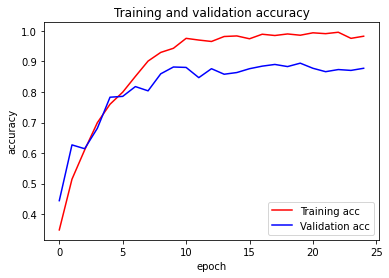

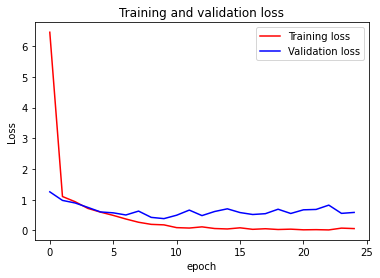

Performance on validation set:
Confusion Matrix
[[178  13   0   1]
 [ 29 172  12   4]
 [  2  13  76   6]
 [  3   4   1 204]]

accuracy:	0.8774
f1_score:	0.8774
Performance on test set:
Confusion Matrix
[[ 19  40  39   2]
 [  3 102   9   1]
 [  2   6  95   2]
 [  5  18   8  43]]

accuracy:	0.6574
f1_score:	0.6574


{'accuracy': 0.6573604060913706, 'f1_score': 0.6573604060913706}

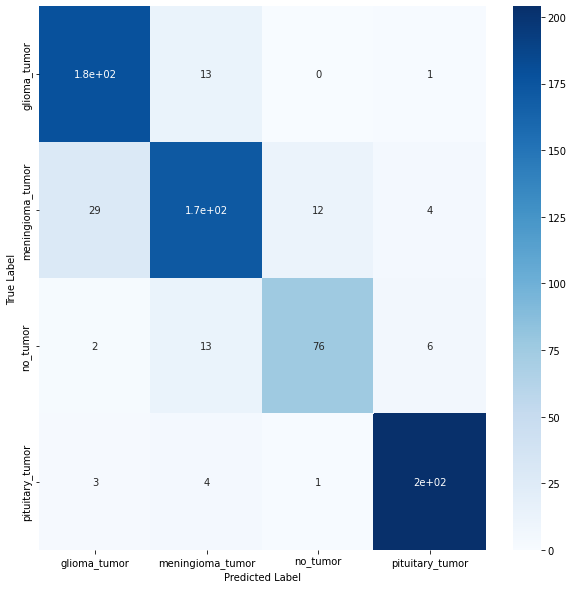

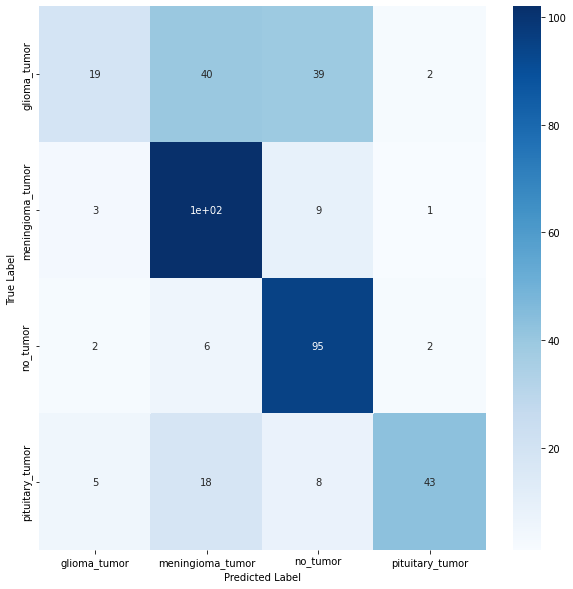

In [ ]:
get_graph(history)
print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(test_lbls, yPred)

In [ ]:
def base_model():
  model = Sequential() 
  model.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape = (200, 200, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.05))
  model.add(Flatten())
  model.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.001)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model
model = base_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 32)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("save.h5",monitor="val_acc",save_best_only=True,mode="auto",verbose=1)

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/30
23/23 [==============================] - ETA: 0s - loss: 1.1991 - acc: 0.4686
Epoch 1: val_acc improved from -inf to 0.52962, saving model to save.h5
23/23 [==============================] - 120s 5s/step - loss: 1.1991 - acc: 0.4686 - val_loss: 1.0736 - val_acc: 0.5296
Epoch 2/30
23/23 [==============================] - ETA: 0s - loss: 1.0259 - acc: 0.5623
Epoch 2: val_acc improved from 0.52962 to 0.60627, saving model to save.h5
23/23 [==============================] - 118s 5s/step - loss: 1.0259 - acc: 0.5623 - val_loss: 0.9853 - val_acc: 0.6063
Epoch 3/30
23/23 [==============================] - ETA: 0s - loss: 0.8465 - acc: 0.6516
Epoch 3: val_acc improved from 0.60627 to 0.68815, saving model to save.h5
23/23 [==============================] - 118s 5s/step - loss: 0.8465 - acc: 0.6516 - val_loss: 0.7729 - val_acc: 0.6882
Epoch 4/30
23/23 [==============================] - ETA: 0s - loss: 0.7163 - acc: 0.7139
Epoch 4: val_acc improved from 0.68815 to 0.73868, saving mode

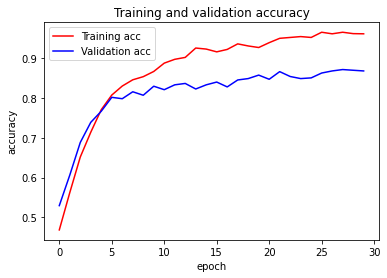

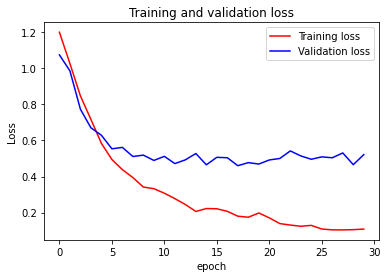

In [ ]:
get_graph(history)

Performance on train set:
Confusion Matrix
[[651  10   0   0]
 [  3 646   3   8]
 [  1   2 318   3]
 [  0   1   0 650]]

accuracy:	0.9865
f1_score:	0.9865


{'accuracy': 0.9864982578397212, 'f1_score': 0.9864982578397212}

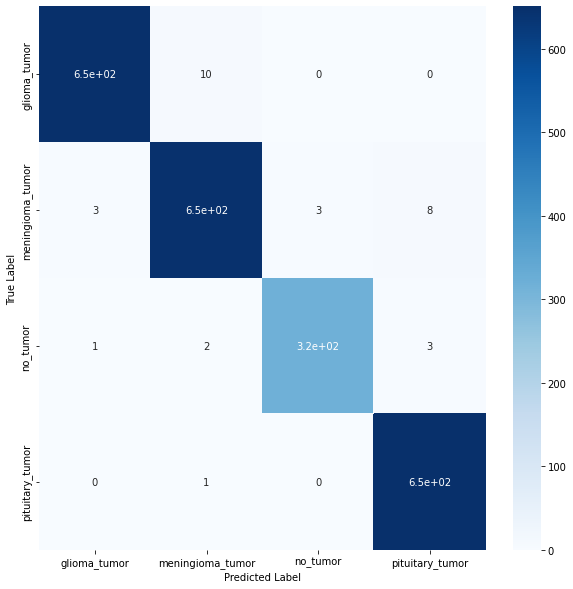

In [ ]:
print('Performance on train set:')
yPred=model.predict(X_train)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_train, yPred)

Performance on validation set:
Confusion Matrix
[[144  20   0   1]
 [ 12 133  10   7]
 [  6  14  47   4]
 [  1   1   0 174]]

accuracy:	0.8676
f1_score:	0.8676


{'accuracy': 0.867595818815331, 'f1_score': 0.8675958188153311}

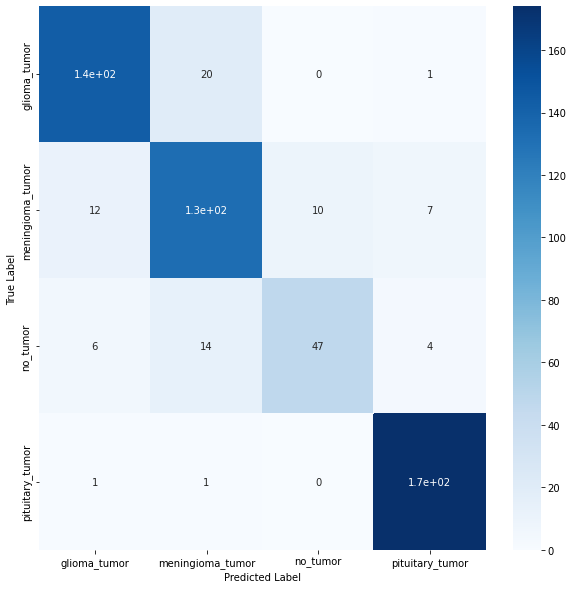

In [ ]:
print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

Performance on test set:
                  precision    recall  f1-score   support

    glioma_tumor       0.85      0.17      0.28       100
meningioma_tumor       0.62      0.85      0.72       115
        no_tumor       0.61      0.90      0.73       105
 pituitary_tumor       0.86      0.74      0.80        74

        accuracy                           0.67       394
       macro avg       0.74      0.67      0.63       394
    weighted avg       0.72      0.67      0.63       394

Confusion Matrix
[[17 34 43  6]
 [ 1 98 14  2]
 [ 2  8 94  1]
 [ 0 17  2 55]]

accuracy:	0.6701
f1_score:	0.6701


{'accuracy': 0.6700507614213198, 'f1_score': 0.6700507614213198}

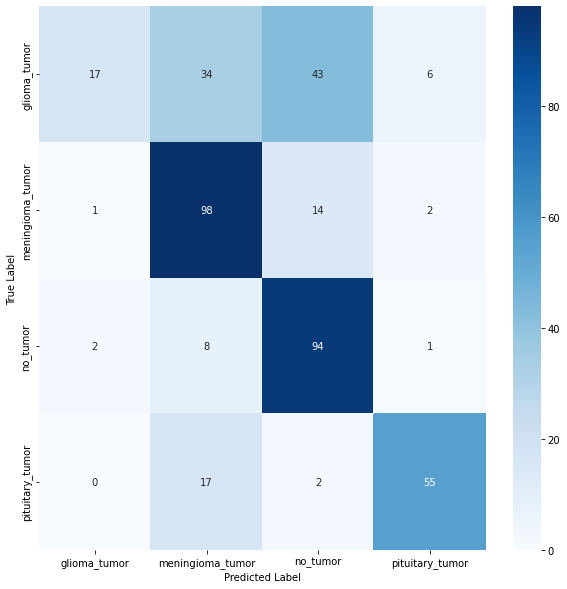

In [ ]:
print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
lab =['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
classification_metrics = metrics.classification_report(test_lbls, yPred, target_names = lab)
print(classification_metrics)
getmetricsReport(test_lbls, yPred)

CNN model defined in files newtry.ipynb and Arranging_project.ipynb, testing dataset changing different hyperparameters and layers resulted into various outcome of accuracy and f1_score. Considering all those result new model called base_model() shows ['accuracy': 0.9864982578397212, 'f1_score': 0.9864982578397212] on training dataset and ['accuracy': 0.867595818815331, 'f1_score': 0.8675958188153311] on validation dataset.

Using this model to classify testing data, model shows ['accuracy': 0.6700507614213198, 'f1_score': 0.6700507614213198] on testing dataset. 

Based on the confusion matrix and classification report, this model is able to classify no_tumor, meningioma_tumor, pituitary_tumor properly but unable to classify glioma_tumor. 

Model is unable to distinguish glioma_tumor whose dataset are classified to no_tumor and meningioma_tumor.

Basic CNN model base_model1()

In [ ]:
def base_model1():
  model1 = Sequential() 
  rel = keras.layers.LeakyReLU(alpha=0.3)
  model1.add(Conv2D(32, (3,3), activation = rel, padding='same', input_shape = (200, 200, 3)))
  model1.add(MaxPooling2D(pool_size=(2, 2)))
  model1.add(Dropout(0.3))
  model1.add(Conv2D(32, (3,3), activation = rel, padding='same'))
  model1.add(MaxPooling2D(pool_size=(2, 2)))
  model1.add(Dropout(0.3))
  model1.add(MaxPooling2D(pool_size=(2, 2)))
  model1.add(Dense(128, activation=rel, kernel_regularizer=regularizers.l2(0.0001)))
  model1.add(Dropout(0.3))
  model1.add(MaxPooling2D(pool_size=(2, 2)))
  model1.add(Dense(16, activation=rel, kernel_regularizer=regularizers.l2(0.0001)))
  model1.add(Dropout(0.3))
  model1.add(Flatten())
  model1.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.001)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model1.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model1
model1 = base_model1()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 32)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history1 = model1.fit(X_train, y_train, epochs=25, batch_size=25, validation_data=(X_val, y_val))

Epoch 1/25
87/87 [==============================] - 6s 63ms/step - loss: 0.8535 - acc: 0.6715 - val_loss: 1.4587 - val_acc: 0.4847
Epoch 2/25
87/87 [==============================] - 5s 60ms/step - loss: 0.8092 - acc: 0.6942 - val_loss: 1.1176 - val_acc: 0.5529
Epoch 3/25
87/87 [==============================] - 5s 59ms/step - loss: 0.7086 - acc: 0.7291 - val_loss: 0.9889 - val_acc: 0.5961
Epoch 4/25
87/87 [==============================] - 5s 60ms/step - loss: 0.6685 - acc: 0.7388 - val_loss: 1.3416 - val_acc: 0.5014
Epoch 5/25
87/87 [==============================] - 5s 60ms/step - loss: 0.6127 - acc: 0.7695 - val_loss: 0.8535 - val_acc: 0.6281
Epoch 6/25
87/87 [==============================] - 5s 60ms/step - loss: 0.5976 - acc: 0.7807 - val_loss: 1.0582 - val_acc: 0.5947
Epoch 7/25
87/87 [==============================] - 5s 60ms/step - loss: 0.5403 - acc: 0.8044 - val_loss: 1.3032 - val_acc: 0.5515
Epoch 8/25
87/87 [==============================] - 5s 60ms/step - loss: 0.5035 - a

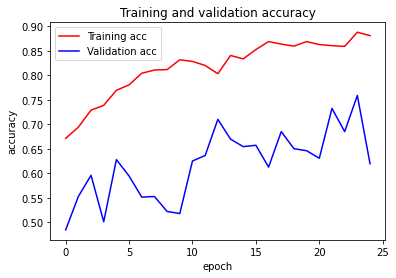

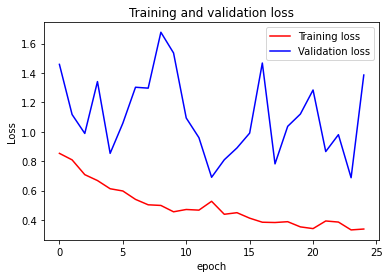

In [ ]:
get_graph(history1)

Performance on test set:
                  precision    recall  f1-score   support

    glioma_tumor       0.29      0.32      0.30       100
meningioma_tumor       0.49      0.48      0.48       115
        no_tumor       0.54      0.36      0.43       105
 pituitary_tumor       0.59      0.78      0.67        74

        accuracy                           0.46       394
       macro avg       0.47      0.49      0.47       394
    weighted avg       0.47      0.46      0.46       394

Confusion Matrix
[[32 35 23 10]
 [26 55 10 24]
 [38 22 38  7]
 [15  1  0 58]]

accuracy:	0.4645
f1_score:	0.4645


{'accuracy': 0.46446700507614214, 'f1_score': 0.46446700507614214}

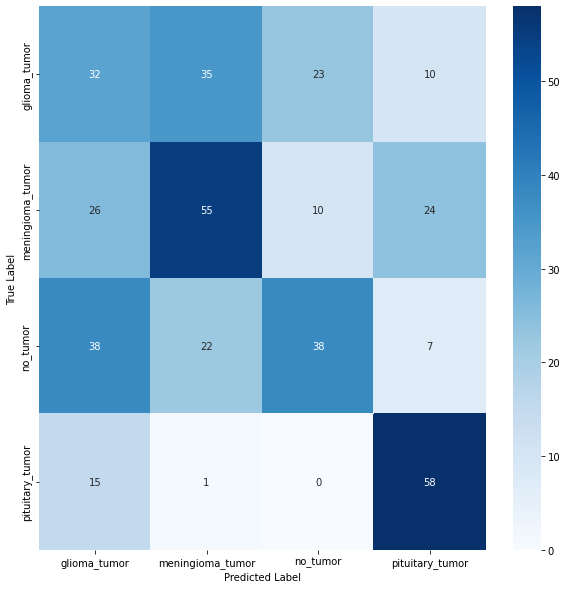

In [ ]:
print('Performance on test set:')
yPred=model1.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
lab =['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
classification_metrics = metrics.classification_report(test_lbls, yPred, target_names = lab)
print(classification_metrics)
getmetricsReport(test_lbls, yPred)

In order to better classify, glioma_tumor activation layer of base_model() is replaced by leaky relu and l2 regularization was also added in base_model1(). This was able to increase the glioma_tumor classification on testing dataset but other categories of tumor value were impoperly classified.

Basic CNN model base_model2()

In [ ]:
def base_model2():
  model2 = Sequential() 
  
  model2.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape = (200, 200, 3)))
  model2.add(MaxPooling2D(pool_size=(2, 2)))
  
  
  model2.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
  model2.add(MaxPooling2D(pool_size=(2, 2)))
  
  
  model2.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
  model2.add(MaxPooling2D(pool_size=(2, 2)))
  model2.add(Dense(256, activation='relu'))
  model2.add(Dropout(0.5))
  model2.add(Dense(16, activation='relu'))
  model2.add(Flatten())
  model2.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.01)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model2.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model2
model2 = base_model2()
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 25, 25, 32)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/20
23/23 [==============================] - 118s 5s/step - loss: 1.3776 - acc: 0.2827 - val_loss: 1.3643 - val_acc: 0.3066
Epoch 2/20
23/23 [==============================] - 114s 5s/step - loss: 1.3637 - acc: 0.2835 - val_loss: 1.3516 - val_acc: 0.3066
Epoch 3/20
23/23 [==============================] - 113s 5s/step - loss: 1.3559 - acc: 0.2705 - val_loss: 1.3446 - val_acc: 0.3066
Epoch 4/20
23/23 [==============================] - 113s 5s/step - loss: 1.3525 - acc: 0.2722 - val_loss: 1.3416 - val_acc: 0.2822
Epoch 5/20
23/23 [==============================] - 113s 5s/step - loss: 1.3513 - acc: 0.2774 - val_loss: 1.3397 - val_acc: 0.2875
Epoch 6/20
23/23 [==============================] - 113s 5s/step - loss: 1.3511 - acc: 0.2796 - val_loss: 1.3386 - val_acc: 0.3066
Epoch 7/20
23/23 [==============================] - 113s 5s/step - loss: 1.3508 - acc: 0.2726 - val_loss: 1.3389 - val_acc: 0.2822
Epoch 8/20
23/23 [==============================] - 113s 5s/step - loss: 1.3510 - a

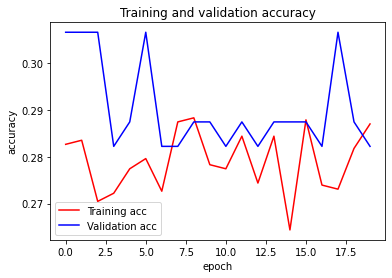

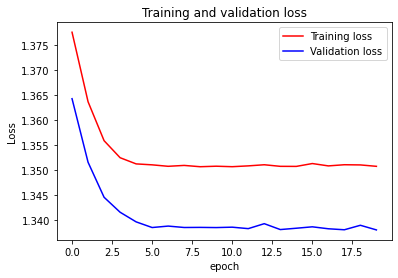

In [ ]:
get_graph(history2)

Performance on test set:
                  precision    recall  f1-score   support

    glioma_tumor       0.00      0.00      0.00       100
meningioma_tumor       0.29      1.00      0.45       115
        no_tumor       0.00      0.00      0.00       105
 pituitary_tumor       0.00      0.00      0.00        74

        accuracy                           0.29       394
       macro avg       0.07      0.25      0.11       394
    weighted avg       0.09      0.29      0.13       394

Confusion Matrix
[[  0 100   0   0]
 [  0 115   0   0]
 [  0 105   0   0]
 [  0  74   0   0]]

accuracy:	0.2919
f1_score:	0.2919


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.2918781725888325, 'f1_score': 0.2918781725888325}

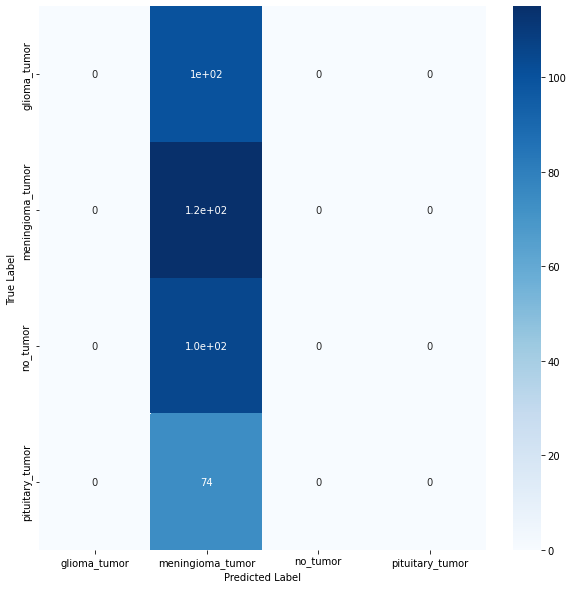

In [ ]:
print('Performance on test set:')
yPred=model2.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
lab =['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
classification_metrics = metrics.classification_report(test_lbls, yPred, target_names = lab)
print(classification_metrics)
getmetricsReport(test_lbls, yPred)

In as previous approach to classify glioma_tumor result were increasing in number for glioma_tumor but outcome of other tumor were improperly classified.
Hence, in base_model2() incresing the complexity of model by adding two filter layers. This model still didn't classify the classes of tumor properly.

So, from all model used base_model() classified with better outcome except for glioma_tumor class.

Hyperparameters tuning used throughout phase I are:

1) Model hyperparameters:
   layers of CNN like Conv2D, pooling layers, dense layers and dropout layers,  etc.
   As model hyperparameters increases the model complexity also increases and time required to complete epoch also increases.

2) Optimizer hyperparameters:
   SGD and Adam optimizers were used. Keeping all parameters constant, losses due to SGD was greater as compared to Adam. So, Adam optimizer was preferred as it adjust the  learning rate with increasing epoch.

3)Data hyperparameters:
  As the dataset contains different image size all images were resized to (200, 200) and validation split was 20% of training dataset.

In [ ]:
def base_model3():
  model3 = Sequential() 
  
  model3.add(Conv2D(64, (3,3), activation = 'relu', strides=(1,1), input_shape = (200, 200, 3)))
  model3.add(MaxPooling2D(pool_size=(2, 2)))
  
  model3.add(Conv2D(128, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  model3.add(Conv2D(256, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

  model3.add(Conv2D(512, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

  model3.add(Conv2D(1024, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2) ))

  #model3.add(Conv2D(1024, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  #model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2) ))

  model3.add(Flatten())
  model3.add(Dense(128, activation='relu'))
  model3.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.001)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model3.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model3
model3 = base_model3()
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 256)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history3 = model3.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/30
44/44 [==============================] - 14s 242ms/step - loss: 15.0137 - acc: 0.4517 - val_loss: 1.0742 - val_acc: 0.4624
Epoch 2/30
44/44 [==============================] - 9s 203ms/step - loss: 0.9132 - acc: 0.5818 - val_loss: 0.7597 - val_acc: 0.6908
Epoch 3/30
44/44 [==============================] - 9s 205ms/step - loss: 0.6963 - acc: 0.7068 - val_loss: 0.8640 - val_acc: 0.7159
Epoch 4/30
44/44 [==============================] - 9s 206ms/step - loss: 0.6132 - acc: 0.7667 - val_loss: 1.1201 - val_acc: 0.5460
Epoch 5/30
44/44 [==============================] - 9s 206ms/step - loss: 0.5524 - acc: 0.7876 - val_loss: 0.5776 - val_acc: 0.7549
Epoch 6/30
44/44 [==============================] - 9s 204ms/step - loss: 0.3589 - acc: 0.8662 - val_loss: 0.4785 - val_acc: 0.8203
Epoch 7/30
44/44 [==============================] - 9s 209ms/step - loss: 0.3122 - acc: 0.8838 - val_loss: 0.4535 - val_acc: 0.8189
Epoch 8/30
44/44 [==============================] - 9s 203ms/step - loss: 

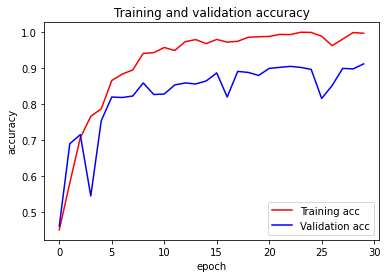

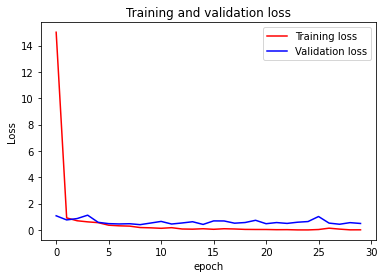

In [ ]:
get_graph(history3)

Performance on test set:
                  precision    recall  f1-score   support

    glioma_tumor       0.86      0.18      0.30       100
meningioma_tumor       0.63      0.84      0.72       115
        no_tumor       0.60      0.95      0.73       105
 pituitary_tumor       0.88      0.62      0.73        74

        accuracy                           0.66       394
       macro avg       0.74      0.65      0.62       394
    weighted avg       0.73      0.66      0.62       394

Confusion Matrix
[[ 18  34  47   1]
 [  0  97  13   5]
 [  3   2 100   0]
 [  0  20   8  46]]

accuracy:	0.6624
f1_score:	0.6624


{'accuracy': 0.6624365482233503, 'f1_score': 0.6624365482233503}

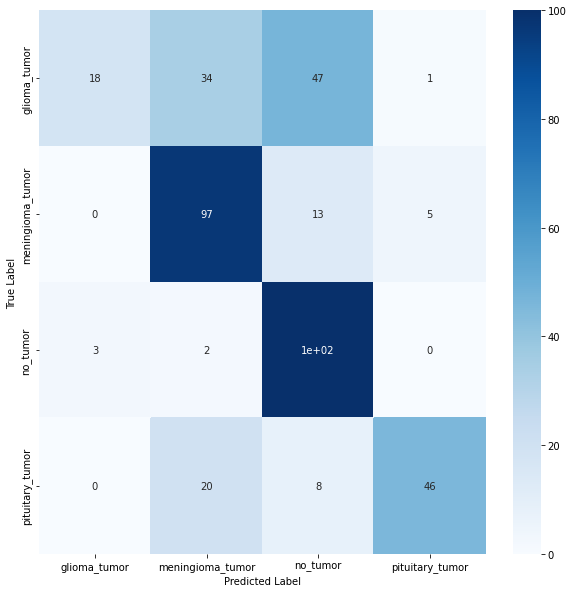

In [ ]:
print('Performance on test set:')
yPred=model3.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
lab =['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
classification_metrics = metrics.classification_report(test_lbls, yPred, target_names = lab)
print(classification_metrics)
getmetricsReport(test_lbls, yPred)

In [ ]:
def base_model4():
  model4 = Sequential() 
  
  model4.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape = (200, 200,3)))
  model4.add(MaxPooling2D(pool_size=(2, 2)))
  
  model4.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
  model4.add(MaxPooling2D(pool_size=(2, 2)))
  
  model4.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
  model4.add(MaxPooling2D(pool_size=(2, 2)))

  model4.add(Conv2D(256, (3,3), activation = 'relu', padding='same'))
  model4.add(MaxPooling2D(pool_size=(2, 2)))

  model4.add(Flatten())
  model4.add(Dense(128, activation='relu'))
  model4.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.01)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model4.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model4
model4 = base_model4()
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history4 = model4.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/20
44/44 [==============================] - 4s 80ms/step - loss: 1.3495 - acc: 0.2946 - val_loss: 1.3467 - val_acc: 0.2674
Epoch 2/20
44/44 [==============================] - 3s 77ms/step - loss: 1.3502 - acc: 0.2858 - val_loss: 1.3488 - val_acc: 0.2674
Epoch 3/20
44/44 [==============================] - 3s 77ms/step - loss: 1.3503 - acc: 0.2946 - val_loss: 1.3490 - val_acc: 0.2674
Epoch 4/20
44/44 [==============================] - 3s 77ms/step - loss: 1.3500 - acc: 0.2821 - val_loss: 1.3475 - val_acc: 0.2674
Epoch 5/20
44/44 [==============================] - 3s 77ms/step - loss: 1.3503 - acc: 0.2946 - val_loss: 1.3483 - val_acc: 0.2674
Epoch 6/20
44/44 [==============================] - 3s 77ms/step - loss: 1.3502 - acc: 0.2946 - val_loss: 1.3468 - val_acc: 0.2674
Epoch 7/20
44/44 [==============================] - 3s 78ms/step - loss: 1.3500 - acc: 0.2862 - val_loss: 1.3476 - val_acc: 0.2674
Epoch 8/20
44/44 [==============================] - 3s 77ms/step - loss: 1.3488 - a

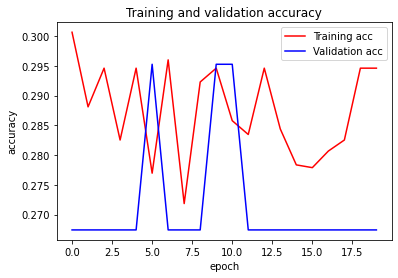

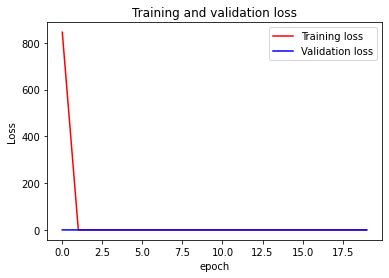

In [ ]:
get_graph(history4)

Performance on test set:
                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.18      0.30       100
meningioma_tumor       0.61      0.84      0.71       115
        no_tumor       0.59      0.94      0.73       105
 pituitary_tumor       0.90      0.58      0.70        74

        accuracy                           0.65       394
       macro avg       0.76      0.64      0.61       394
    weighted avg       0.74      0.65      0.61       394

Confusion Matrix
[[18 30 50  2]
 [ 1 97 14  3]
 [ 0  6 99  0]
 [ 0 27  4 43]]

accuracy:	0.6523
f1_score:	0.6523


{'accuracy': 0.6522842639593909, 'f1_score': 0.6522842639593909}

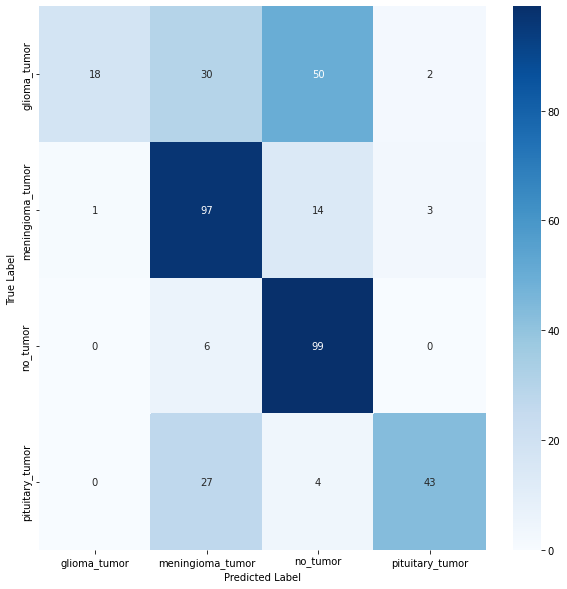

In [ ]:
print('Performance on test set:')
yPred=model4.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
lab =['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
classification_metrics = metrics.classification_report(test_lbls, yPred, target_names = lab)
print(classification_metrics)
getmetricsReport(test_lbls, yPred)

## Result of changing hyperparametrs

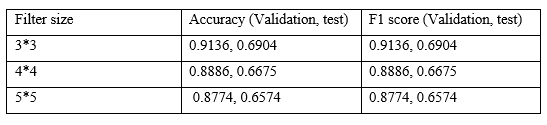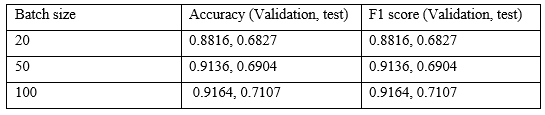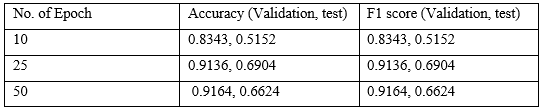


# Phase II 

In [ ]:
layer_names = [layer.name for layer in model4.layers]
layer_names

['conv2d_9',
 'max_pooling2d_8',
 'conv2d_10',
 'max_pooling2d_9',
 'conv2d_11',
 'max_pooling2d_10',
 'conv2d_12',
 'max_pooling2d_11',
 'flatten_2',
 'dense_4',
 'dense_5']

In [ ]:
model4.layers

In [ ]:
layer_outputs = [layer.output for layer in model4.layers]
layer_outputs

[<KerasTensor: shape=(None, 200, 200, 32) dtype=float32 (created by layer 'conv2d_9')>,
 <KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'max_pooling2d_8')>,
 <KerasTensor: shape=(None, 100, 100, 64) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 50, 50, 64) dtype=float32 (created by layer 'max_pooling2d_9')>,
 <KerasTensor: shape=(None, 50, 50, 128) dtype=float32 (created by layer 'conv2d_11')>,
 <KerasTensor: shape=(None, 25, 25, 128) dtype=float32 (created by layer 'max_pooling2d_10')>,
 <KerasTensor: shape=(None, 25, 25, 256) dtype=float32 (created by layer 'conv2d_12')>,
 <KerasTensor: shape=(None, 12, 12, 256) dtype=float32 (created by layer 'max_pooling2d_11')>,
 <KerasTensor: shape=(None, 36864) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_5')>]

In [ ]:
X=test_imgs[0]
input = X.reshape((1,) + X.shape)                   
input = input/255.0

print(input.shape)                   

(1, 200, 200, 3)


In [ ]:
feature_maps = feature_map_model.predict(input)

In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d_9 is =======>> (1, 200, 200, 32)
The shape of the max_pooling2d_8 is =======>> (1, 100, 100, 32)
The shape of the conv2d_10 is =======>> (1, 100, 100, 64)
The shape of the max_pooling2d_9 is =======>> (1, 50, 50, 64)
The shape of the conv2d_11 is =======>> (1, 50, 50, 128)
The shape of the max_pooling2d_10 is =======>> (1, 25, 25, 128)
The shape of the conv2d_12 is =======>> (1, 25, 25, 256)
The shape of the max_pooling2d_11 is =======>> (1, 12, 12, 256)
The shape of the flatten_2 is =======>> (1, 36864)
The shape of the dense_4 is =======>> (1, 128)
The shape of the dense_5 is =======>> (1, 4)


Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9_input (InputLayer)  [(None, 200, 200, 3)]    0         
                                                                 
 conv2d_9 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


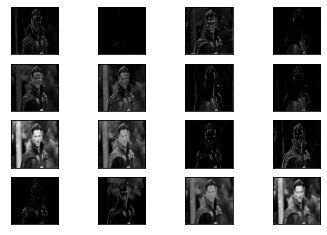

In [ ]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = model4
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('DrStrange.jpg', target_size=(200, 200))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values )
img = img/255.0
# get feature map for first hidden layer
feature_maps = model.predict(img)

square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

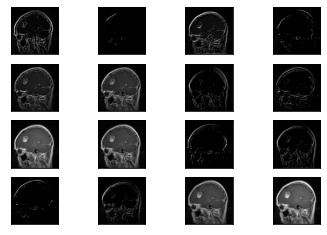

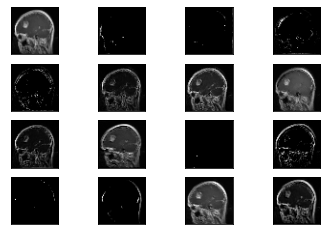

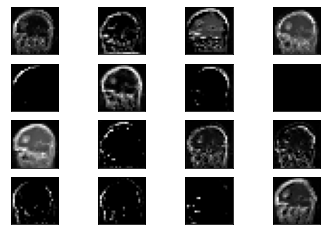

In [ ]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = model4
# redefine model to output right after the first hidden layer
ixs = [1,3,5]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
rnd_img = rint(0,len(train_imgs))
cl = train_lbls[rnd_img]
img = train_imgs[rnd_img]


# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = img/255.0
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 4
for fmap in feature_maps:
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn off axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
      
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

In [ ]:
model = model3
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d_4 (3, 3, 3, 64)
conv2d_5 (3, 3, 64, 128)
conv2d_6 (3, 3, 128, 256)
conv2d_7 (3, 3, 256, 512)
conv2d_8 (3, 3, 512, 1024)


In [ ]:
filters , bias = model.layers[4].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

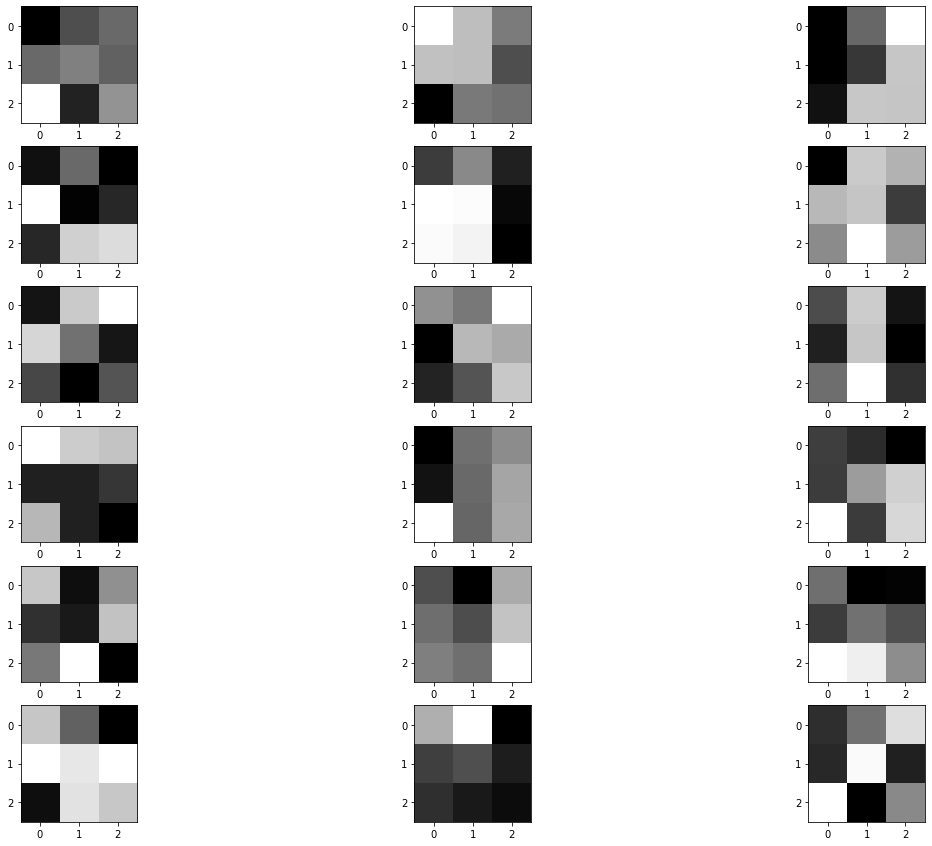

In [ ]:
#visualising 6 filters out of 64 filters from 1st layer
n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()

In [ ]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_4 (None, 200, 200, 64)
2 conv2d_5 (None, 100, 100, 128)
4 conv2d_6 (None, 50, 50, 256)
6 conv2d_7 (None, 25, 25, 512)
8 conv2d_8 (None, 12, 12, 1024)


In [ ]:
model = tf.keras.models.Model(inputs=model.inputs , outputs=model.layers[1].output)

In [ ]:
rnd_img = rint(0,len(train_imgs))
cl = train_lbls[rnd_img]
image = train_imgs[rnd_img]

image = np.expand_dims(image, axis=0)

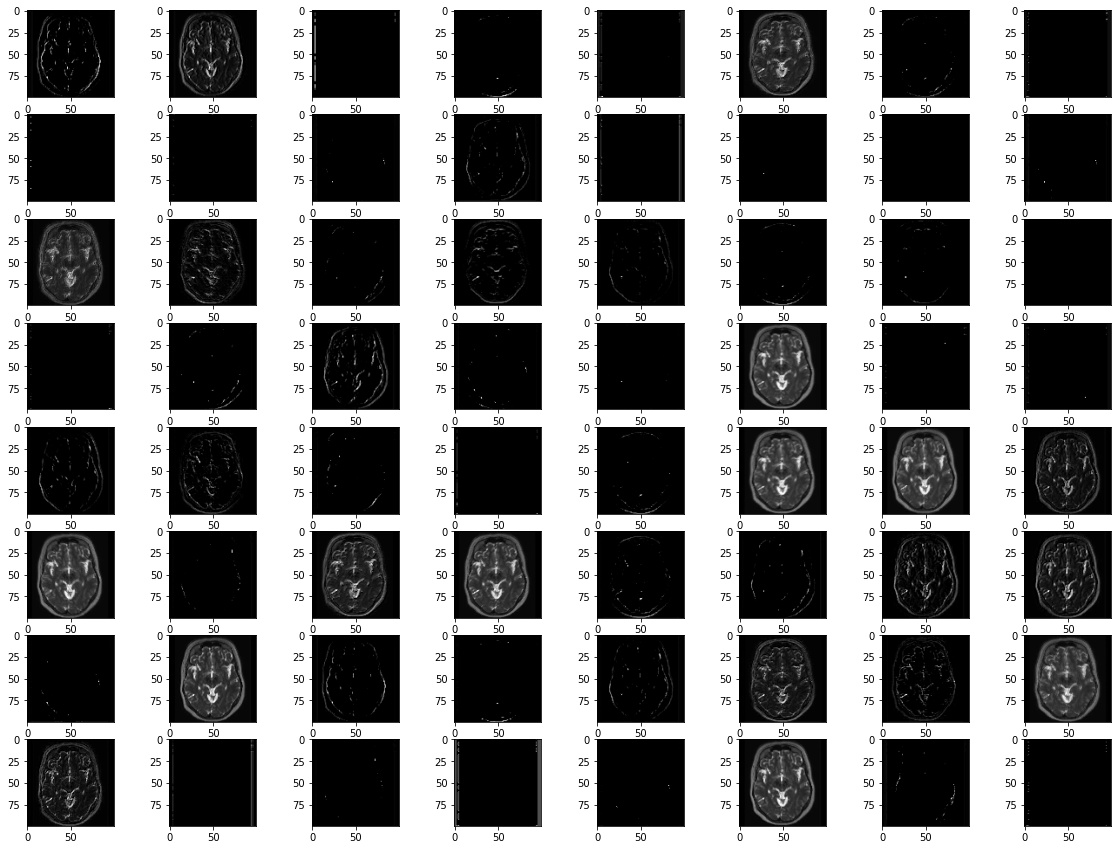

In [ ]:
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

In [ ]:
model12 = model3

In [ ]:
blocks = [ 4, 5 , 6, 7 , 8]
outputs = [model12.layers[i].output for i in blocks]

model12 = tf.keras.models.Model( inputs= model12.inputs, outputs = outputs)

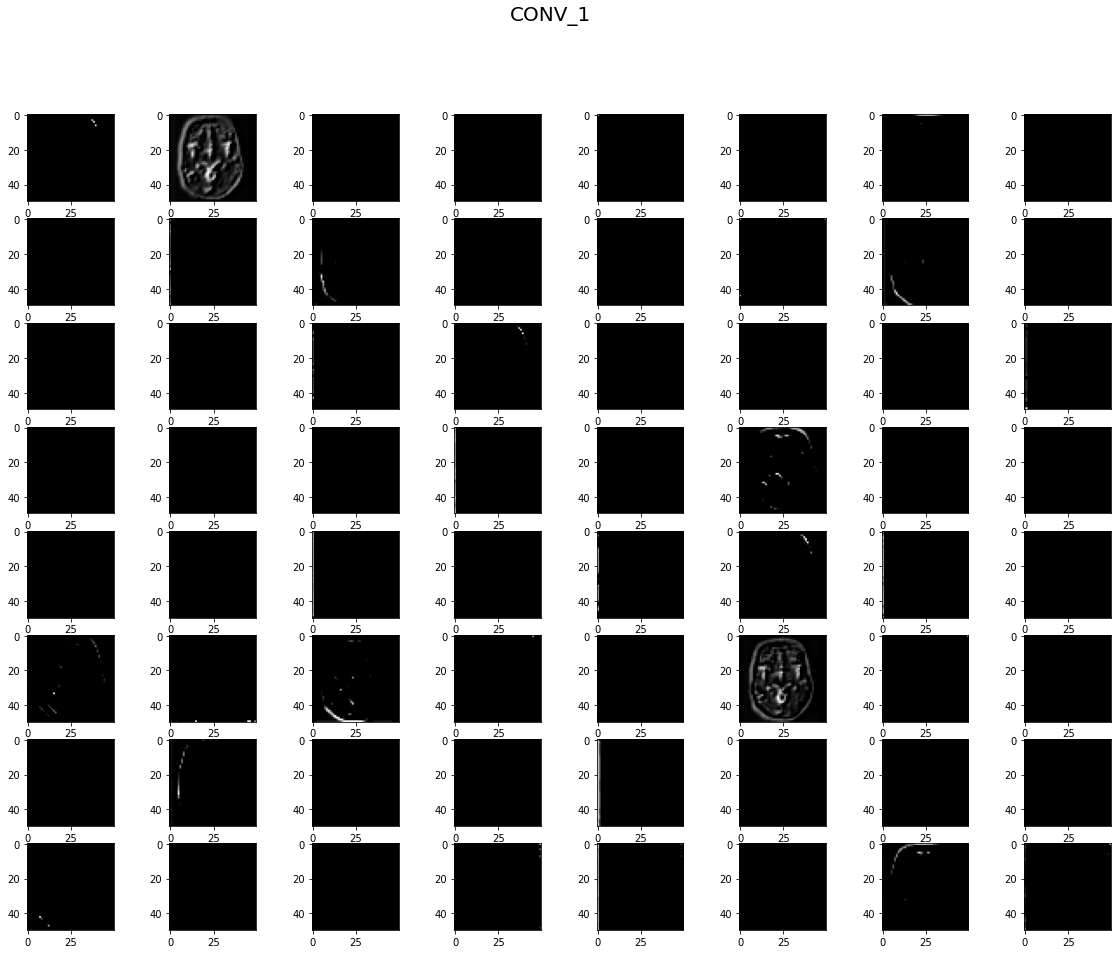

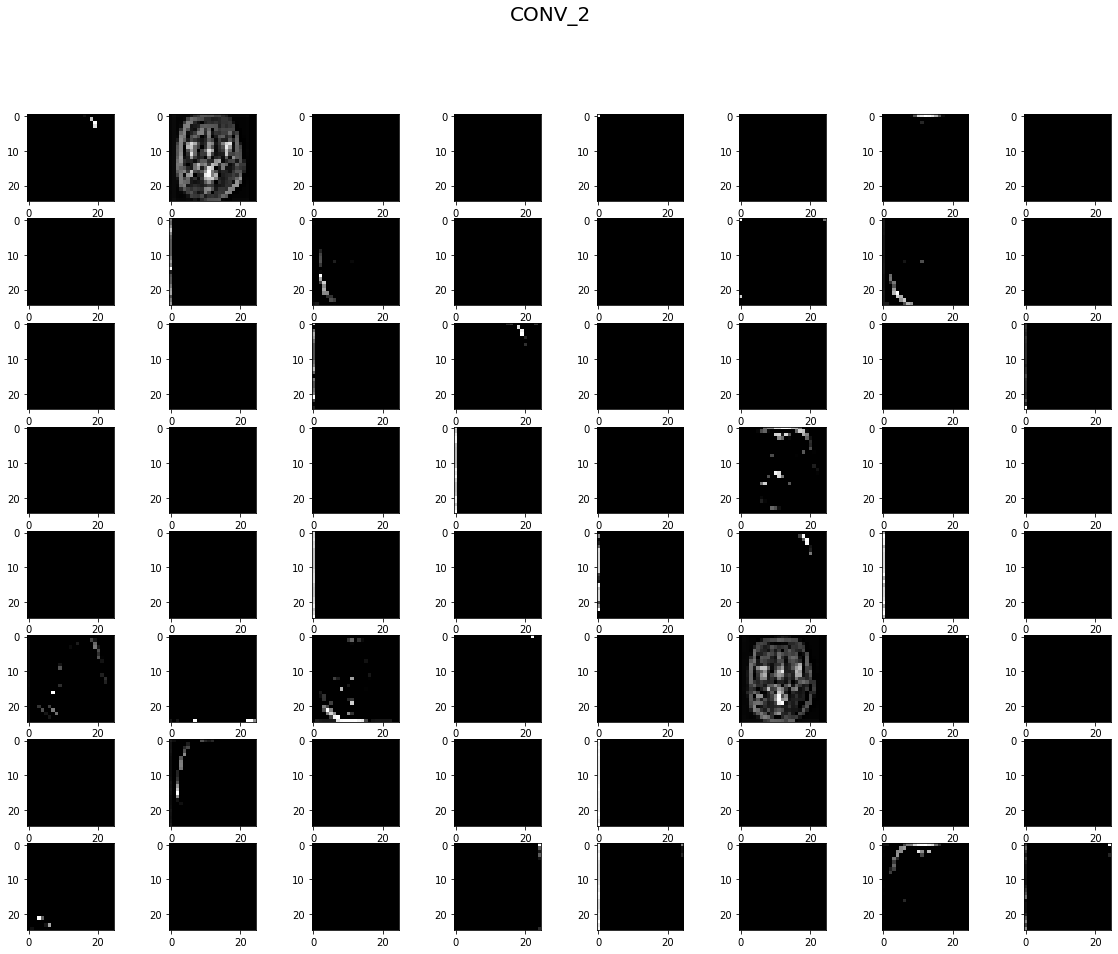

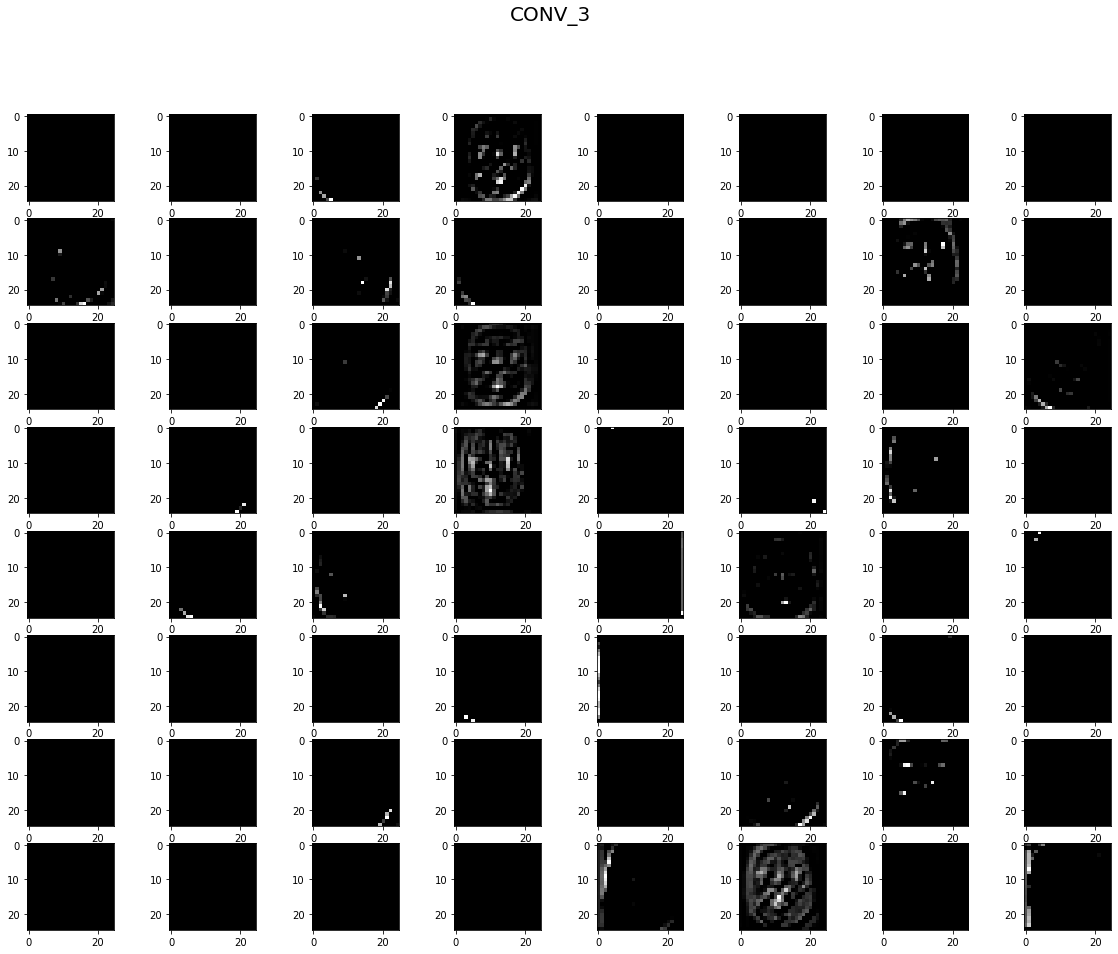

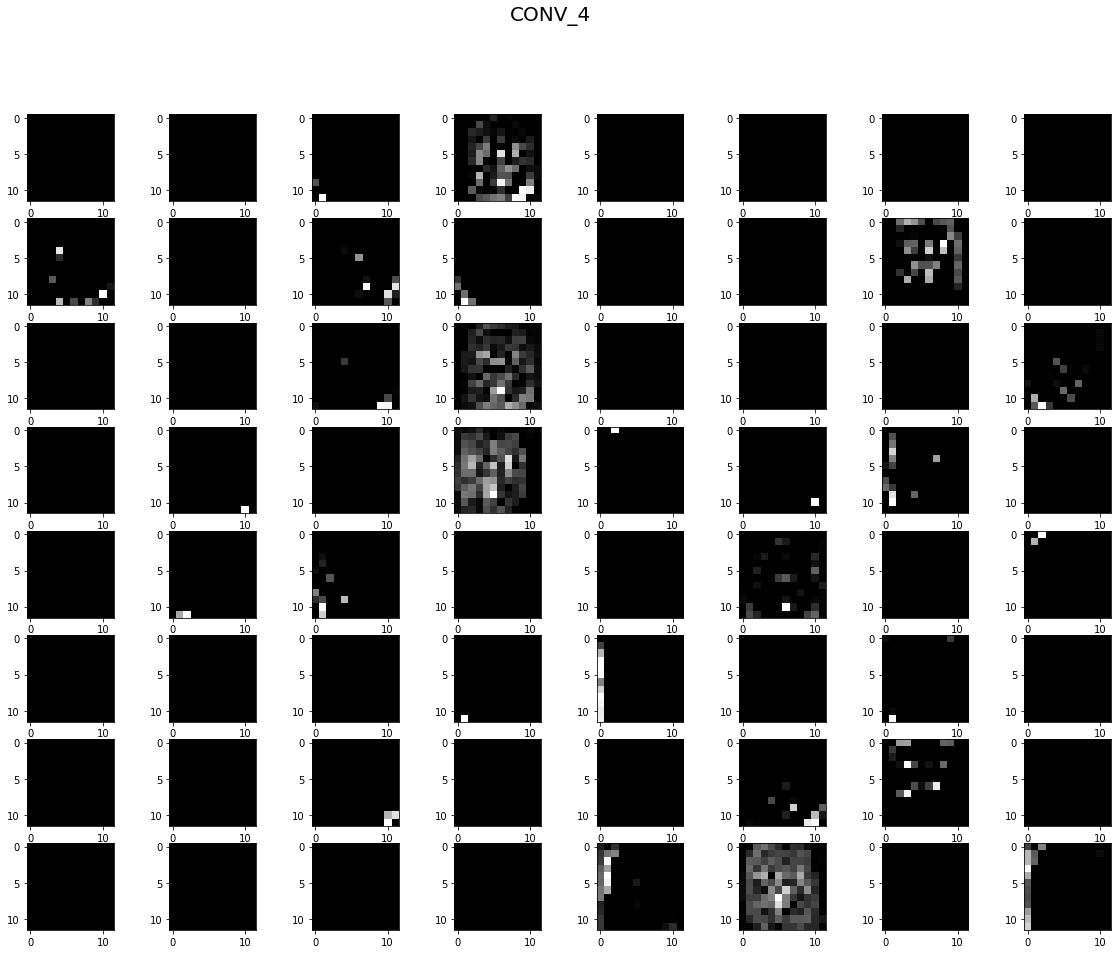

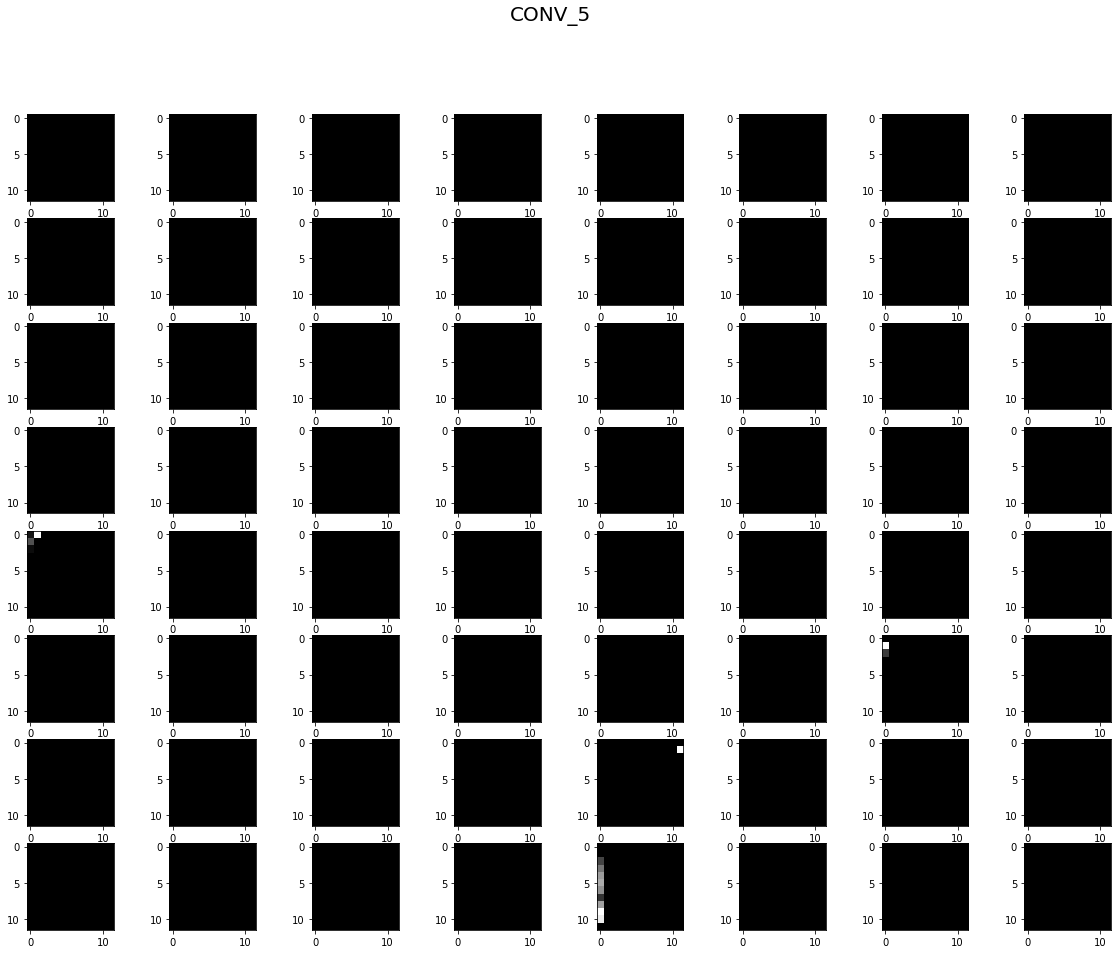

In [ ]:
feature_map = model12.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = plt.figure(figsize=(20,15))
  
    fig.suptitle("CONV_{}".format(i-3) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
plt.show()